# Meeting with Jeff

## What is the distribution of proteins in the old dataset (that I compiled by hand)?

In [1]:
import os, sys
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

old_dataset_file = "../src/data/ngram_dataset.json"

with open(old_dataset_file, 'r') as f:
    old_dataset = json.load(f)

num_peptides = []
binding_data = []
for allele in old_dataset:
    pairs = old_dataset[allele]
    num_peptides.append(len(pairs))
    bdata = [np.log(float(b)) for (p,b) in pairs]
    binding_data += bdata



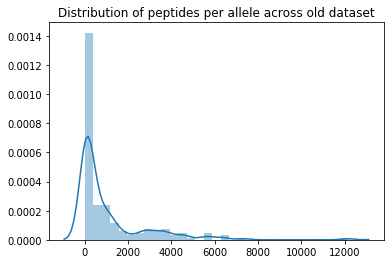

In [2]:
plt.title("Distribution of peptides per allele across old dataset")
ax = sns.distplot(num_peptides, hist=True)

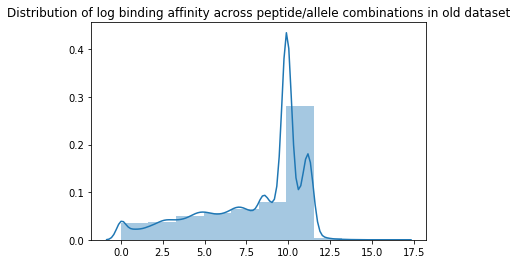

In [3]:
plt.title("Distribution of log binding affinity across peptide/allele combinations in old dataset")
ax2 = sns.distplot(binding_data, 10, hist=True)

In [17]:
flurry_dataset_file = "../src/data/mhcflurry_dataset.json"
with open(flurry_dataset_file, 'r') as f:
    flurry_dataset = json.load(f)

num_peptides_flurry = []
binding_data_flurry = []
for allele in flurry_dataset:
    pairs = flurry_dataset[allele]
    num_peptides_flurry.append(len(pairs))
    bdata = [float(b) for (p,b) in pairs]
    binding_data_flurry += bdata


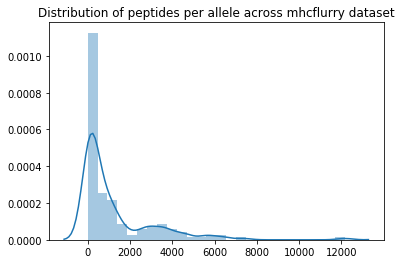

In [12]:
plt.title("Distribution of peptides per allele across mhcflurry dataset")
ax3 = sns.distplot(num_peptides_flurry, hist=True)

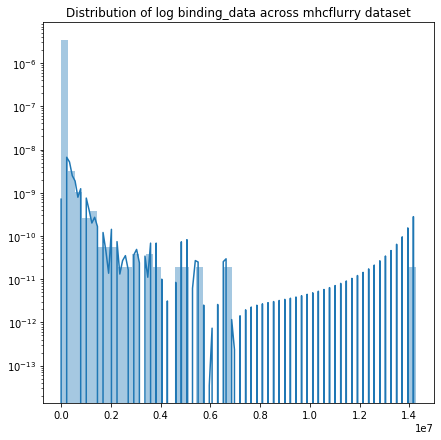

In [18]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
plt.title("Distribution of log binding_data across mhcflurry dataset")
ax3 = sns.distplot(binding_data_flurry, hist=True, norm_hist=True, ax=ax)


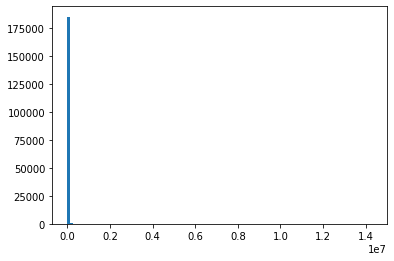

In [20]:
num_bins = 100
plt.hist(binding_data_flurry, num_bins)
plt.show()

## How does the model perform with feature localization and without feature localization?

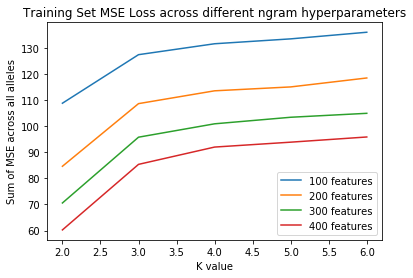

In [7]:
feature_localization_file = "../experiments/ngram.json"
with open(feature_localization_file, 'r') as f:
    localized_data = json.load(f)

hundred_features = []
two_hundred_features = []
three_hundred_features = []
four_hundred_features = []
varying_k = [i for i in range(2, 7)]

for k in localized_data.keys():
    vals = localized_data[k]
    for v in vals:
        if v[0] == 100:
            hundred_features.append(v[1])
        elif v[0] == 200:
            two_hundred_features.append(v[1])
        elif v[0] == 300:
            three_hundred_features.append(v[1])
        elif v[0] == 400:
            four_hundred_features.append(v[1])

plt.title("Training Set MSE Loss across different ngram hyperparameters")
plt.xlabel("K value")
plt.ylabel("Sum of MSE across all alleles")
plt.plot(varying_k, hundred_features, label="100 features")
plt.plot(varying_k, two_hundred_features, label="200 features")
plt.plot(varying_k, three_hundred_features, label="300 features")
plt.plot(varying_k, four_hundred_features, label="400 features")
plt.legend()
plt.show()

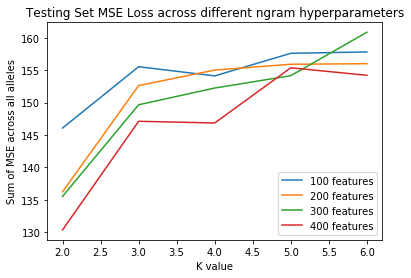

In [8]:
hundred_features = []
two_hundred_features = []
three_hundred_features = []
four_hundred_features = []
varying_k = [i for i in range(2, 7)]

for k in localized_data.keys():
    vals = localized_data[k]
    for v in vals:
        if v[0] == 100:
            hundred_features.append(v[2])
        elif v[0] == 200:
            two_hundred_features.append(v[2])
        elif v[0] == 300:
            three_hundred_features.append(v[2])
        elif v[0] == 400:
            four_hundred_features.append(v[2])

plt.title("Testing Set MSE Loss across different ngram hyperparameters")
plt.xlabel("K value")
plt.ylabel("Sum of MSE across all alleles")
plt.plot(varying_k, hundred_features, label="100 features")
plt.plot(varying_k, two_hundred_features, label="200 features")
plt.plot(varying_k, three_hundred_features, label="300 features")
plt.plot(varying_k, four_hundred_features, label="400 features")
plt.legend()
plt.show()